# Assignment - Deep Neural Network - Classification

In this assignment, you will focus on housing. The data set (housing.csv) includes information about houses in each district in California. Predict the ocean proximity (`ocean_proximity` column) in the data set. This column determines whether the district is inland, near ocean, etc. This is a multi-class classification task. 

**The unit of analysis is a DISTRICT**



## Goal

Use the **housing.csv** data set and build the below models to predict **ocean_proximity**. 

## Submission:

Please save and submit this Jupyter notebook file. The correctness of the code is important. **Readability and organization of your code is also important.** Do not submit unreadable/undecipherable code. You may want to use markdown cells to create sections, and use comments where necessary.


# Read and Prepare the Data

In [ ]:
# Insert as many cells as you need

# Importing Required Libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

import tensorflow as tf

from keras import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

# Reading Data from .csv file

In [4]:
data = pd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


# Checking Structure and Data Types



In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20635 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [6]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
data['ocean_proximity'].value_counts(dropna=False)

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
NaN              5
Name: ocean_proximity, dtype: int64

In [6]:
data['total_bedrooms'].value_counts(dropna=False)

NaN       207
280.0      55
331.0      51
345.0      50
393.0      49
         ... 
1691.0      1
2205.0      1
1448.0      1
1887.0      1
2546.0      1
Name: total_bedrooms, Length: 1924, dtype: int64

# Checking missing values in all the columns

In [8]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         5
dtype: int64

# Segregating Predictors and Target Column

In [9]:
data_predictor = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                   'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
print(data_predictor)

data_target = ['ocean_proximity']
data_target

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


['ocean_proximity']

# Checkign correlation between predictors

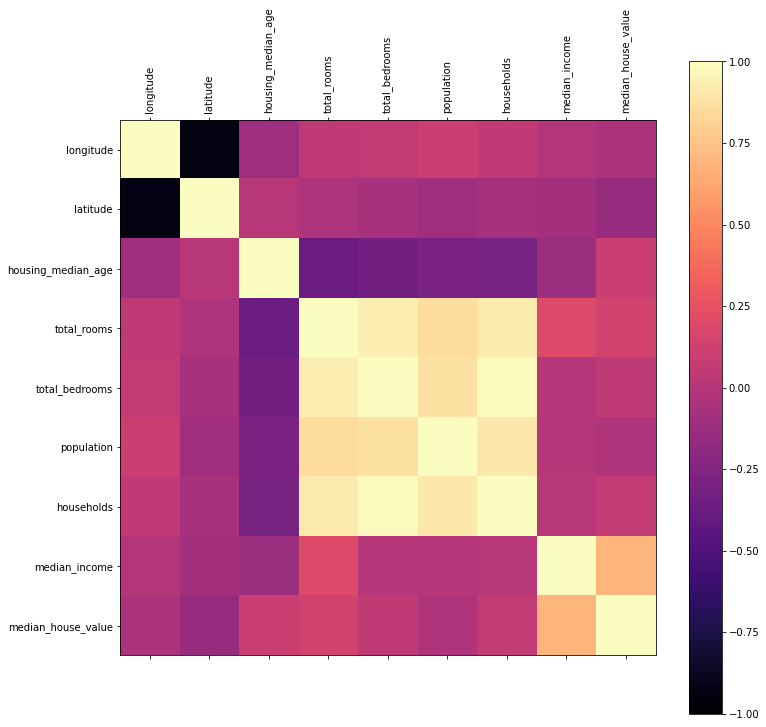

In [10]:
corr = data[data_predictor].corr()
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='magma', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data_predictor),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data_predictor)
ax.set_yticklabels(data_predictor)
plt.show()

In [11]:
data.loc[:, data.columns != 'ocean_proximity'].corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


# Checking target value distribution and 

<AxesSubplot:xlabel='ocean_proximity', ylabel='count'>

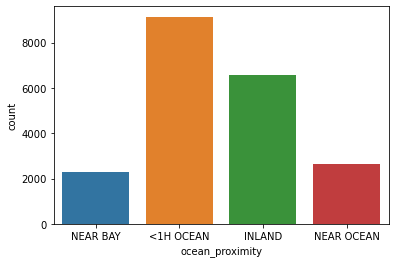

In [187]:
sns.countplot(data=data,x="ocean_proximity")

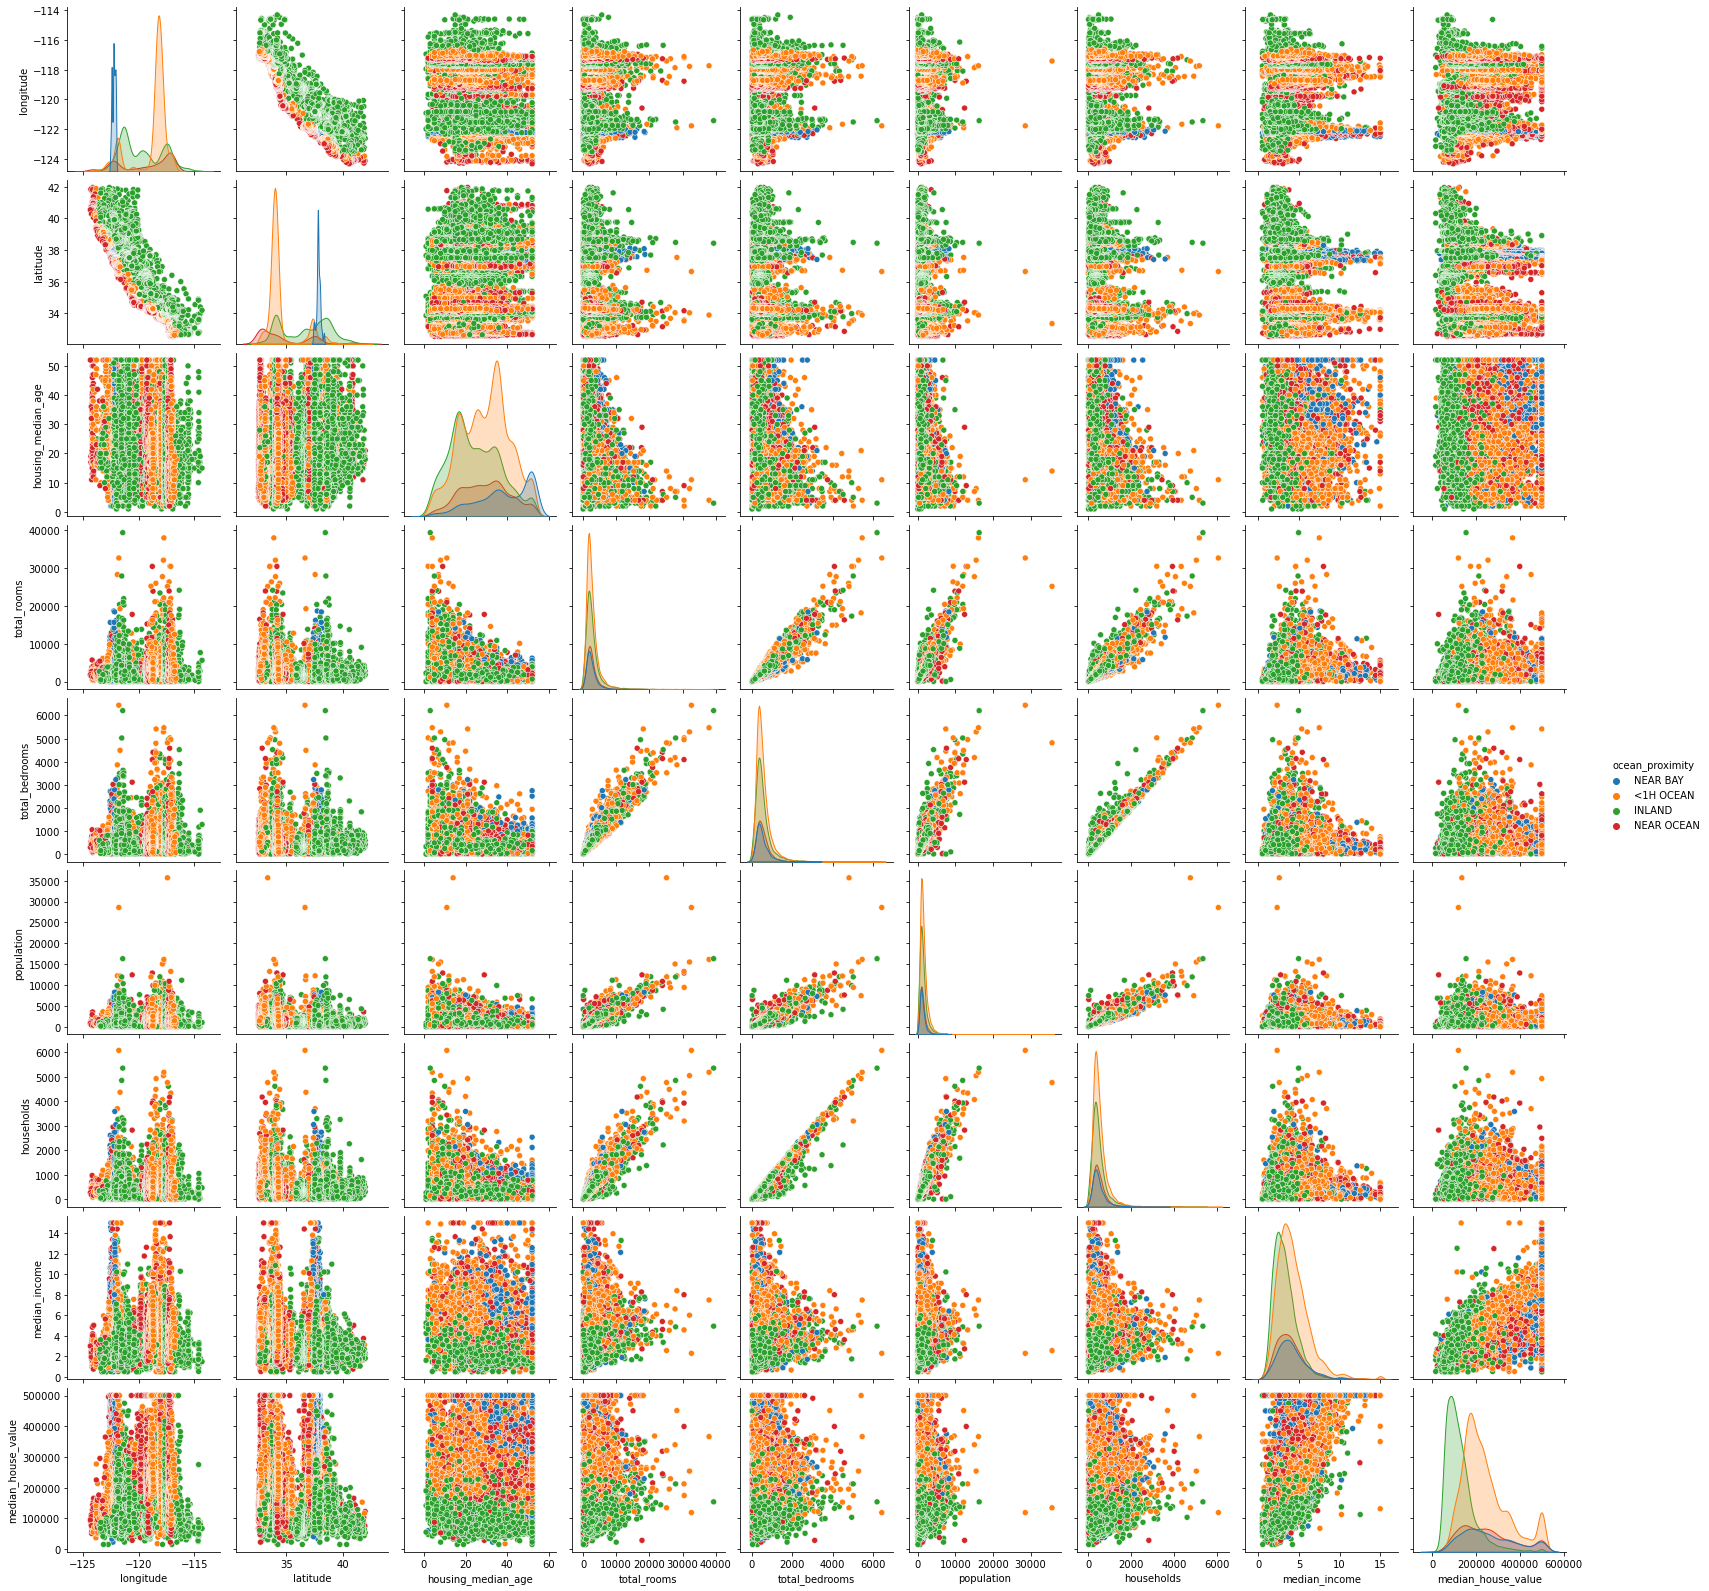

In [189]:
sns.pairplot(data=data,hue="ocean_proximity")

# Droping rows with missing values - as they are less in number to overall data

In [12]:
ip_data = data.dropna()
ip_data = pd.DataFrame(ip_data)
ip_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [13]:
ip_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20428 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20428 non-null  float64
 1   latitude            20428 non-null  float64
 2   housing_median_age  20428 non-null  int64  
 3   total_rooms         20428 non-null  int64  
 4   total_bedrooms      20428 non-null  float64
 5   population          20428 non-null  int64  
 6   households          20428 non-null  int64  
 7   median_income       20428 non-null  float64
 8   median_house_value  20428 non-null  int64  
 9   ocean_proximity     20428 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB


In [104]:
x = ip_data[data_predictor]
print(x)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income  media

In [15]:
y = ip_data[data_target]
y.dtypes

ocean_proximity    object
dtype: object

In [192]:
x = pd.DataFrame(x,columns=ip_data[data_predictor].columns)
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.327063,1.051474,0.982560,-0.803865,-0.970299,-0.973424,-0.976905,2.344844,2.129617
1,-1.322072,1.042112,-0.606022,2.041841,1.348077,0.861123,1.670109,2.332314,1.314260
2,-1.332054,1.037431,1.856279,-0.535264,-0.825549,-0.819883,-0.843508,1.782662,1.258805
3,-1.337044,1.037431,1.856279,-0.623577,-0.718766,-0.765173,-0.733652,0.932756,1.165225
4,-1.337044,1.037431,1.856279,-0.462050,-0.611983,-0.758996,-0.629027,-0.013287,1.173024


In [195]:
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.327063,1.051474,0.982560,-0.803865,-0.970299,-0.973424,-0.976905,2.344844,2.129617
1,-1.322072,1.042112,-0.606022,2.041841,1.348077,0.861123,1.670109,2.332314,1.314260
2,-1.332054,1.037431,1.856279,-0.535264,-0.825549,-0.819883,-0.843508,1.782662,1.258805
3,-1.337044,1.037431,1.856279,-0.623577,-0.718766,-0.765173,-0.733652,0.932756,1.165225
4,-1.337044,1.037431,1.856279,-0.462050,-0.611983,-0.758996,-0.629027,-0.013287,1.173024


# Transform variable(s)

Transform at least one variable. For example, you can transform an existing variable (such as using a log transformation), or create a new variable from two existing variables.

In [ ]:
# Insert as many cells as you need

# Scalar transformation of predictors

In [61]:
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-1.32706278,  1.05147394,  0.98255961, ..., -0.97690541,
         2.34484433,  2.1296171 ],
       [-1.32207197,  1.04211178, -0.60602193, ...,  1.67010937,
         2.33231395,  1.3142597 ],
       [-1.33205359,  1.0374307 ,  1.85627946, ..., -0.84350842,
         1.78266242,  1.258805  ],
       ...,
       [-0.82299112,  1.77704101, -0.92373824, ..., -0.17390784,
        -1.14323171, -0.99230926],
       [-0.8728992 ,  1.77704101, -0.84430916, ..., -0.39362053,
        -1.05520322, -1.05816172],
       [-0.83297273,  1.74895454, -1.00316731, ...,  0.079808  ,
        -0.78069334, -1.01743718]])

# Ecoding target variable

In [ ]:
cleanup_ocean_proximity = {"ocean_proximity": {"<1H OCEAN": 0, "INLAND": 1, "NEAR OCEAN": 2, "NEAR BAY": 3}}

y = y.replace(cleanup_ocean_proximity)
y.head()  

# DNNClassifier model

Use Tensorflow's DNNClassifier to predict the target variable. You can try deep networks.

In [ ]:
# Insert as many cells as you need

# Running into errors, incomplete implementation

In [64]:
def create_feature_column():
    
    f_longitude = tf.feature_column.numeric_column('longitude')
    f_latitude = tf.feature_column.numeric_column('latitude')
    f_housing_median_age = tf.feature_column.numeric_column('housing_median_age')
    f_total_bedrooms = tf.feature_column.numeric_column('total_bedrooms')
    f_population = tf.feature_column.numeric_column('population')
    f_households = tf.feature_column.numeric_column('households')
    f_median_income = tf.feature_column.numeric_column('median_income')
    f_median_house_value = tf.feature_column.numeric_column('median_house_value')
    
    feature_column = [f_longitude,f_latitude,
                      f_housing_median_age,f_total_bedrooms,f_population,
                     f_households,f_median_income,f_median_house_value]
    
    return feature_column

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(ip_data[data_predictor], ip_data[data_target], 
                                                    test_size = 0.25, 
                                                    random_state = 49081)

In [69]:
feature_column = create_feature_column()

input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(X_train, Y_train,
                                                batch_size = 50,
                                                num_epochs = 700,
                                                shuffle= False)

eval_func = tf.compat.v1.estimator.inputs.pandas_input_fn(X_test, Y_test,
                                                batch_size = 50,
                                                num_epochs = 1,
                                                shuffle = False)

pred_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x = X_test,
                                                num_epochs = 1,
                                                shuffle = False)


In [ ]:
optimizer = tf.compat.v1.train.AdamOptimizer(
    learning_rate=tf.compat.v1.train.exponential_decay(
        global_step=0,
        learning_rate=0.1,
        decay_steps=10000,
        decay_rate=0.96, staircase=True))

In [305]:
feature_column

[NumericColumn(key='longitude', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='latitude', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='housing_median_age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='total_bedrooms', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='population', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='households', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='median_income', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='median_house_value', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [70]:
dnn_model = tf.estimator.DNNClassifier( feature_columns= feature_column,
                                        n_classes = 4,
                                      hidden_units = [64,32])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\BLACKN~1\\AppData\\Local\\Temp\\tmpzj0h8mo5', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [71]:
Y_train = tf.convert_to_tensor(Y_train)

In [72]:
Y_train

<tf.Tensor: shape=(15321, 1), dtype=string, numpy=
array([[b'NEAR BAY'],
       [b'NEAR BAY'],
       [b'NEAR BAY'],
       ...,
       [b'INLAND'],
       [b'INLAND'],
       [b'<1H OCEAN']], dtype=object)>

In [73]:
dnn_train = dnn_model.train(input_fn=input_func)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.


TypeError: Expected any non-tensor type, got a tensor instead.

In [ ]:
# ------------------------------------------
# TensorFlow Implementation
# ------------------------------------------

# Extract the features from the training data
feats = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)

# Building a 3-layer DNN with 50 units each.
classifier_tf = tf.contrib.learn.DNNClassifier(feature_columns=feats, 
                                               hidden_units=[50, 50, 50], 
                                               n_classes=3)

# Use the train data to train this classifier
classifier_tf.fit(X_train, Y_train, steps=5000)

# Use the trained model to predict on the test data
predictions = list(classifier_tf.predict(X_test, as_iterable=True))
score = metrics.accuracy_score(Y_test, predictions)



# Keras DNN model

Use Tensorflow's Keras library to predict the same target variable. 

In [ ]:
# Insert as many cells as you need

# standardizing the input feature

In [105]:
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-1.32706278,  1.05147394,  0.98255961, ..., -0.97690541,
         2.34484433,  2.1296171 ],
       [-1.32207197,  1.04211178, -0.60602193, ...,  1.67010937,
         2.33231395,  1.3142597 ],
       [-1.33205359,  1.0374307 ,  1.85627946, ..., -0.84350842,
         1.78266242,  1.258805  ],
       ...,
       [-0.82299112,  1.77704101, -0.92373824, ..., -0.17390784,
        -1.14323171, -0.99230926],
       [-0.8728992 ,  1.77704101, -0.84430916, ..., -0.39362053,
        -1.05520322, -1.05816172],
       [-0.83297273,  1.74895454, -1.00316731, ...,  0.079808  ,
        -0.78069334, -1.01743718]])

In [106]:
# Categorical Encoding
#from sklearn.preprocessing import OrdinalEncoder

#ord_enc = OrdinalEncoder()
#y["ocean_proximity_cat"] = ord_enc.fit_transform(y["ocean_proximity"])
#y["ocean_proximity", "ocean_proximity_cat"].head(11)

In [107]:
y['ocean_proximity'].value_counts()

0    9034
1    6496
2    2628
3    2270
Name: ocean_proximity, dtype: int64

In [18]:
cleanup_ocean_proximity = {"ocean_proximity": {"<1H OCEAN": 0, "INLAND": 1, "NEAR OCEAN": 2, "NEAR BAY": 3}}

y = y.replace(cleanup_ocean_proximity)
y.head()                          

,ocean_proximity
0,3
1,3
2,3
3,3
4,3


In [108]:
#Spliting data in train test

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 49081)

In [109]:
print(X_train.shape); print(X_test.shape)

(14299, 9)
(6129, 9)


In [110]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(100, activation='relu', kernel_initializer='random_normal', input_dim=9))
#Second  Hidden Layer
classifier.add(Dense(50, activation='relu', kernel_initializer='random_normal'))
#Third Hidden Layer
classifier.add(Dense(10, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))


In [111]:
#Compiling the neural network

#classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
classifier.compile(optimizer ='adam',loss='categorical_crossentropy', metrics =['accuracy'])

In [112]:
#Fitting the data to the training dataset

classifier.fit(X_train,y_train,epochs=30)

Epoch 1/30
447/447 [==============================] - 1s 471us/step - loss: 0.0000e+00 - accuracy: 0.5140
Epoch 2/30
447/447 [==============================] - 0s 467us/step - loss: 0.0000e+00 - accuracy: 0.5507
Epoch 3/30
447/447 [==============================] - 0s 470us/step - loss: 0.0000e+00 - accuracy: 0.5448
Epoch 4/30
447/447 [==============================] - 0s 467us/step - loss: 0.0000e+00 - accuracy: 0.5469
Epoch 5/30
447/447 [==============================] - 0s 474us/step - loss: 0.0000e+00 - accuracy: 0.5575
Epoch 6/30
447/447 [==============================] - 0s 476us/step - loss: 0.0000e+00 - accuracy: 0.5521
Epoch 7/30
447/447 [==============================] - 0s 510us/step - loss: 0.0000e+00 - accuracy: 0.5461
Epoch 8/30
447/447 [==============================] - 0s 479us/step - loss: 0.0000e+00 - accuracy: 0.5460
Epoch 9/30
447/447 [==============================] - 0s 470us/step - loss: 0.0000e+00 - accuracy: 0.5467
Epoch 10/30
447/447 [=========================

In [113]:
pred_train= classifier.predict(X_train)
scores = classifier.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= classifier.predict(X_test)
scores2 = classifier.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    

Accuracy on training data: 0.5499685406684875% 
 Error on training data: 0.45003145933151245
Accuracy on test data: 0.5405449271202087% 
 Error on test data: 0.45945507287979126


# Dropping columns with high correlation and re-executing the model

In [115]:
x1 = ip_data[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                                                             'median_income', 'median_house_value']]

In [116]:
sc = StandardScaler()
x1 = sc.fit_transform(x1)
x1

array([[-1.32706278,  1.05147394,  0.98255961, -0.80386466,  2.34484433,
         2.1296171 ],
       [-1.32207197,  1.04211178, -0.60602193,  2.04184136,  2.33231395,
         1.3142597 ],
       [-1.33205359,  1.0374307 ,  1.85627946, -0.53526369,  1.78266242,
         1.258805  ],
       ...,
       [-0.82299112,  1.77704101, -0.92373824, -0.1751462 , -1.14323171,
        -0.99230926],
       [-0.8728992 ,  1.77704101, -0.84430916, -0.35543374, -1.05520322,
        -1.05816172],
       [-0.83297273,  1.74895454, -1.00316731,  0.06783014, -0.78069334,
        -1.01743718]])

In [117]:
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state = 49081)

In [118]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(100, activation='relu', kernel_initializer='random_normal', input_dim=6))
#Second  Hidden Layer
classifier.add(Dense(50, activation='relu', kernel_initializer='random_normal'))
#Third Hidden Layer
classifier.add(Dense(10, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [119]:
classifier.compile(optimizer ='adam',loss='categorical_crossentropy', metrics =['accuracy'])

In [120]:
#Fitting the data to the training dataset

classifier.fit(X_train,y_train,epochs=30)

Epoch 1/30
447/447 [==============================] - 0s 452us/step - loss: 0.0000e+00 - accuracy: 0.5017
Epoch 2/30
447/447 [==============================] - 0s 449us/step - loss: 0.0000e+00 - accuracy: 0.5370
Epoch 3/30
447/447 [==============================] - 0s 449us/step - loss: 0.0000e+00 - accuracy: 0.5523
Epoch 4/30
447/447 [==============================] - 0s 449us/step - loss: 0.0000e+00 - accuracy: 0.5461
Epoch 5/30
447/447 [==============================] - 0s 454us/step - loss: 0.0000e+00 - accuracy: 0.5425
Epoch 6/30
447/447 [==============================] - 0s 449us/step - loss: 0.0000e+00 - accuracy: 0.5413
Epoch 7/30
447/447 [==============================] - 0s 452us/step - loss: 0.0000e+00 - accuracy: 0.5418
Epoch 8/30
447/447 [==============================] - 0s 449us/step - loss: 0.0000e+00 - accuracy: 0.5489
Epoch 9/30
447/447 [==============================] - 0s 452us/step - loss: 0.0000e+00 - accuracy: 0.5444
Epoch 10/30
447/447 [=========================

# Evaluating model - not a much difference

In [121]:
pred_train= classifier.predict(X_train)
scores = classifier.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= classifier.predict(X_test)
scores2 = classifier.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    

Accuracy on training data: 0.5424854755401611% 
 Error on training data: 0.45751452445983887
Accuracy on test data: 0.5325501561164856% 
 Error on test data: 0.4674498438835144


# MLPClassifier (for comparison purposes)

Use the MLPClassifier from the Sci-kit Learn library and predict the same target variable.

In [ ]:
# Insert as many cells as you need

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,random_state=1, test_size=0.2)
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

In [29]:
clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),
                    activation="relu",
                    random_state=1)
clf_fit = clf.fit(X_train, y_train)
y_pred=clf_fit.predict(X_test)
print(clf_fit.score(X_test, y_test))

C:\Users\BlackNinja\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9432207537934411


In [32]:
confusion_matrix(y_pred,y_test)

array([[2556,   36,   73,    7],
       [  41, 1838,    0,    5],
       [ 108,    0,  705,   10],
       [  40,    4,   24,  682]], dtype=int64)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      2745
           1       0.98      0.98      0.98      1878
           2       0.86      0.88      0.87       802
           3       0.91      0.97      0.94       704

    accuracy                           0.94      6129
   macro avg       0.92      0.94      0.93      6129
weighted avg       0.94      0.94      0.94      6129



In [30]:
clf = MLPClassifier().fit(X_train, Y_train)
clf

C:\Users\BlackNinja\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MLPClassifier()

In [31]:
#Create Standardizer

standardizer = StandardScaler()

In [32]:
#Standardize features

X_std = standardizer.fit_transform(x)

In [48]:
#create a pipeline

#pipe = Pipeline([('Standardizer',standardizer),('clf',clf.fit(X_train,Y_train))])
pipe = Pipeline([('scale',StandardScaler()),('clf',MLPClassifier())])

In [44]:
clf.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [49]:
clf.get_params().keys()

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

# Hyperparameter tuning - Takes 20mins to run

In [55]:
#Hyperparameters tuning

#parameter_space = {
#    'clf__hidden_layer_sizes': [(10,30,10),(20,)],
#    'clf__activation': ['identity', 'logistic', 'tanh', 'relu'],
#    'clf__solver': ['lbfgs','sgd', 'adam'],
#    'clf__alpha': [0.0001, 0.05],
#    'clf__learning_rate': ['constant','adaptive'],
#}

parameter_space = [{'clf__alpha':[10.0 ** ~ np.arange(1,7).any()],
                    #'clf__alpha':[0.0001, 0.05]
                    'clf__hidden_layer_sizes': [(100,),(50,)],
                    'clf__max_iter': [1000,500],
                    'clf__activation':['identity', 'logistic','relu','tanh'],
                    'clf__solver': ['lbfgs','sgd', 'adam'],
                    'clf__learning_rate': ['constant','invscaling','adaptive']
                  }]

from sklearn.model_selection import GridSearchCV

clf_gscv = GridSearchCV(pipe, parameter_space, n_jobs=-1, cv=5)
clf_gscv.fit(X_train, y_train)

C:\Users\BlackNinja\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\BlackNinja\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('clf', MLPClassifier())]),
             n_jobs=-1,
             param_grid=[{'clf__activation': ['identity', 'logistic', 'relu',
                                              'tanh'],
                          'clf__alpha': [1.0],
                          'clf__hidden_layer_sizes': [(100,), (50,)],
                          'clf__learning_rate': ['constant', 'invscaling',
                                                 'adaptive'],
                          'clf__max_iter': [1000, 500],
                          'clf__solver': ['lbfgs', 'sgd', 'adam']}])

In [56]:
#View for best estimators for better model performance

clf_gscv.best_estimator_.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('clf',
   MLPClassifier(activation='tanh', alpha=1.0, hidden_layer_sizes=(50,),
                 learning_rate='invscaling', max_iter=1000, solver='lbfgs'))],
 'verbose': False,
 'scale': StandardScaler(),
 'clf': MLPClassifier(activation='tanh', alpha=1.0, hidden_layer_sizes=(50,),
               learning_rate='invscaling', max_iter=1000, solver='lbfgs'),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'clf__activation': 'tanh',
 'clf__alpha': 1.0,
 'clf__batch_size': 'auto',
 'clf__beta_1': 0.9,
 'clf__beta_2': 0.999,
 'clf__early_stopping': False,
 'clf__epsilon': 1e-08,
 'clf__hidden_layer_sizes': (50,),
 'clf__learning_rate': 'invscaling',
 'clf__learning_rate_init': 0.001,
 'clf__max_fun': 15000,
 'clf__max_iter': 1000,
 'clf__momentum': 0.9,
 'clf__n_iter_no_change': 10,
 'clf__nesterovs_momentum': True,
 'clf__power_t': 0.5,
 'clf__random_state': None,
 'clf__shuffle': True,
 'clf__solver': 

# Testing with best parameters

In [57]:
clf_best = MLPClassifier(activation='tanh', 
                         alpha=1.0, 
                         hidden_layer_sizes=(50,),
                         learning_rate='invscaling', 
                         max_iter=1000, 
                         solver='lbfgs')
clf_best_fit = clf_best.fit(X_train, y_train)
y_pred=clf_best_fit.predict(X_test)
print(clf_best_fit.score(X_test, y_test))

C:\Users\BlackNinja\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9515418502202643


C:\Users\BlackNinja\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [58]:
confusion_matrix(y_pred,y_test)

array([[2615,   49,   81,    7],
       [  30, 1828,    0,    2],
       [  92,    0,  709,   15],
       [   8,    1,   12,  680]], dtype=int64)

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2745
           1       0.98      0.97      0.98      1878
           2       0.87      0.88      0.88       802
           3       0.97      0.97      0.97       704

    accuracy                           0.95      6129
   macro avg       0.94      0.94      0.94      6129
weighted avg       0.95      0.95      0.95      6129



# Discussion

Provide an executive summary of your work. In your summary, discuss your model building approach, your results, and the best model. Compare and contrast the three models you built. Also, address any issues of overfitting, etc. if applicable.

# Executive Summary:

## Implementation: 2 running models and 1 un-successful model.

I have implemented 3 models in this assignment and the maximum accuracy that I have got is from MLPClassifier models, 
which is 95.15% after hyperparameter tuning and 94.33% without hyperparameter tuning. We might end up not doing the 
parameter tuning as it is time intensive(took 20 minutes to execute) and there is not much difference.

My model builing approach tend to revolve around understanding the dataset where I have tried to understand the type of data
that is loaded from the .csv file. Looking for the missing values and resolving them. In this case since the data has around
20k rows, and there are just around 200 rows which has missing values, I have dropped them. In other case we could have filled
the missing values using various techniques.

Next steps was understading of the target variable distribution, so that would could have a better understanding if there is 
highly sckwed data. But this data looks moreover fine to go and start building logorithm out of it.

Before starting with any machine learning I have performed two main steps. 
    1. Ecoding target variable into numerical categories.
    2. Scalar transforming the input variables.
    
Model building approach: My approach towards building any machine learning technique has sticked to first directly applying 
        it and then understand the initial model and result of it. Once done we go ahead with the hyperpara-
        -meter tuning so that we can have best output out of it.
        
